In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [3]:
np.__version__

'1.21.5'

In [5]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [6]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [7]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [8]:
# 一个映射单词到整数索引的词典
word_index = imdb.get_word_index()

# 保留第一个索引
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [9]:
print(train_data)
decode_review(train_data[1000])

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

"<START> although i had seen <UNK> in a theater way back in <UNK> i couldn't remember anything of the plot except for vague images of kurt thomas running and fighting against a backdrop of stone walls and disappointment regarding the ending br br after reading some of the other reviews i picked up a copy of the newly released dvd to once again enter the world of <UNK> br br it turns out this is one of those films produced during the '80s that would go directly to video today the film stars champion <UNK> kurt thomas as jonathan <UNK> <UNK> out of the blue to <UNK> the nation of <UNK> to enter and hopefully win the game a <UNK> <UNK> <UNK> by the khan who encourages his people by yelling what sounds like <UNK> power the goal of the mission involves the star wars defense system jonathan is trained in the martial arts by princess <UNK> who never speaks or leaves the house once trained tries to blend in with the locals by wearing a bright red <UNK> with <UNK> of blue and white needless to 

In [10]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [11]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [12]:
train_data[0]

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

In [13]:
len(train_data[0])

256

In [14]:
# 输入形状是用于电影评论的词汇数目（10,000 词）
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


2021-12-29 15:41:11.456097: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-29 15:41:11.456908: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [17]:
import time
begin_time = time.time()
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)
end_time = time.time()
print("Training over. It costs {:.2f} minutes".format((end_time - begin_time) / 60))

2021-12-29 15:41:22.143574: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-12-29 15:41:22.311469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/20
30/30 [==============================] - 7s 217ms/step - loss: 0.6916 - accuracy: 0.5665 - val_loss: 0.6890 - val_accuracy: 0.6814
Epoch 2/20


2021-12-29 15:41:28.907792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 6s 211ms/step - loss: 0.6847 - accuracy: 0.6625 - val_loss: 0.6799 - val_accuracy: 0.7379
Epoch 3/20
30/30 [==============================] - 6s 210ms/step - loss: 0.6708 - accuracy: 0.7561 - val_loss: 0.6630 - val_accuracy: 0.7544
Epoch 4/20
30/30 [==============================] - 6s 214ms/step - loss: 0.6470 - accuracy: 0.7758 - val_loss: 0.6358 - val_accuracy: 0.7719
Epoch 5/20
30/30 [==============================] - 6s 212ms/step - loss: 0.6114 - accuracy: 0.7905 - val_loss: 0.5989 - val_accuracy: 0.7868
Epoch 6/20
30/30 [==============================] - 6s 212ms/step - loss: 0.5667 - accuracy: 0.8155 - val_loss: 0.5550 - val_accuracy: 0.8072
Epoch 7/20
30/30 [==============================] - 6s 209ms/step - loss: 0.5177 - accuracy: 0.8338 - val_loss: 0.5098 - val_accuracy: 0.8221
Epoch 8/20
30/30 [==============================] - 6s 210ms/step - loss: 0.4687 - accuracy: 0.8511 - val_loss: 0.4675 - val_accuracy: 0.8358
Epoch 9/20
30/30 

In [18]:
results = model.evaluate(test_data,  test_labels, verbose=2)

results

782/782 - 3s - loss: 0.3061 - accuracy: 0.8756 - 3s/epoch - 3ms/step


[0.3060893714427948, 0.8755600452423096]

In [19]:
history

In [20]:
history_dict = history.history

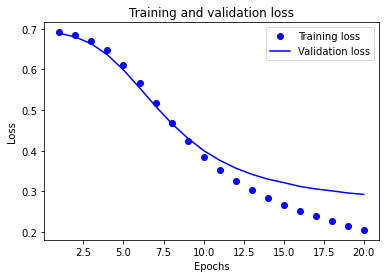

In [21]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# “bo”代表 "蓝点"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b代表“蓝色实线”
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

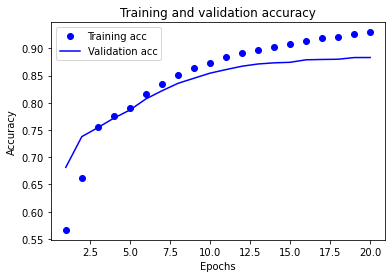

In [22]:
plt.clf()   # 清除数字

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [23]:
test_data[0]

array([   1,  591,  202,   14,   31,    6,  717,   10,   10,    2,    2,
          5,    4,  360,    7,    4,  177, 5760,  394,  354,    4,  123,
          9, 1035, 1035, 1035,   10,   10,   13,   92,  124,   89,  488,
       7944,  100,   28, 1668,   14,   31,   23,   27, 7479,   29,  220,
        468,    8,  124,   14,  286,  170,    8,  157,   46,    5,   27,
        239,   16,  179,    2,   38,   32,   25, 7944,  451,  202,   14,
          6,  717,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [50]:
model.predict_on_batch(test_data[20:27])

array([[0.9889141 ],
       [0.9834774 ],
       [0.36197135],
       [0.8334087 ],
       [0.81379837],
       [0.8935048 ],
       [0.03395244]], dtype=float32)

In [52]:
def is_useless_num(n):
    return n > 3
test_data_1 = list(filter(is_useless_num, test_data[20]))
print(test_data_1)

[14, 22, 16, 31, 15, 13, 28, 4465, 8, 67, 18, 49, 58, 13, 16, 1264, 8, 169, 12, 47, 77, 285, 6658, 4, 487, 7, 14, 22, 47, 77, 38, 8625, 2882, 5, 230, 724, 51, 9, 110, 34, 4, 311, 13, 258, 12, 1139, 15, 38, 111, 84, 149, 80, 24, 332, 200, 49, 55, 674, 411, 21, 849, 48, 24, 4, 20, 80, 97, 281, 11, 6, 275, 96, 5, 9, 55, 530, 4, 22, 47, 111, 537, 5, 105, 9320, 295, 187, 14, 31, 109, 6, 132, 937, 47, 2313, 39, 4, 1986, 6929, 111, 5, 413, 6, 55, 976, 1676, 103, 3427, 49, 58, 11, 1172, 659, 6, 11, 4, 1351, 1510, 5, 143, 6, 1193, 471, 7, 687, 9, 626, 64, 8, 169, 285, 9, 24, 33, 32, 51, 12, 186, 659, 309, 170, 56, 429, 4, 1931, 5513, 7, 926, 5, 993, 11, 661, 8, 97, 788, 89, 674, 6, 1601, 681, 9, 5, 1407, 18, 6, 325, 778, 17, 4, 890, 9, 11, 2800, 429, 7, 4008, 5, 3408, 671, 10, 10, 6, 1703, 56, 8, 6980, 5, 976, 701, 570, 1299, 5, 505, 14, 22, 80, 563, 25, 13, 258, 4, 177, 7, 14, 20, 8, 30, 1339, 5, 9, 24, 6, 20, 8, 30, 3714, 321, 140, 851, 12, 639]


In [53]:
decode_review(test_data_1)

"this film was one that i have waited to see for some time i was glad to find it has been everything anticipated the writing of this film has been so finely crafted and far beyond what is seen by the audience i found it amusing that so many people watching will not read between some very important lines but indeed if not the movie will make sense in a different way and is very brilliant the film has many stories and characters woven together around this one character a man whom has rose from the streets amidst many and become a very powerful criminal after spending some time in prison finds a in the justice system and through a disturbing turn of events is released only to find everything is not at all what it seems finds himself going up against the higher realm of society and political in order to make clear how important a man's word is and stands for a war begins as the street is in arms against of wealth and corrupt power br br a build up to explosive and powerful non stop twists 

In [55]:
model.predict([[1, 2, 3]])

2021-12-29 16:01:51.808283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0.00104364]], dtype=float32)

In [ ]:
model.predict_generator(test_data)

In [42]:
model.predict_on_batch(test_data)

TypeError: predict_on_batch() takes 2 positional arguments but 3 were given

In [81]:
def get_word_index(word):
    if word_index.get(word) == None :
        return 0
    return word_index.get(word)
    

def encode_text(text):
    text_arr = text.split(' ')
    print(text_arr)
    ans = list(map(get_word_index, text_arr))
    return ans
model.predict([encode_text("One side of the space adventure, the other side is a commonplace emotional drama. No matter how hard sci-fi appearance: wormholes, black holes, space adventures, multi-dimensional space ...... the most core is still affection and love. Science and theory are actually for the feelings, with a very hard shell wrapped in the softest emotions. Because of this, it will not be a serious great science fiction film like 2001, but there are more full of feelings. Including those tears")])


['One', 'side', 'of', 'the', 'space', 'adventure,', 'the', 'other', 'side', 'is', 'a', 'commonplace', 'emotional', 'drama.', 'No', 'matter', 'how', 'hard', 'sci-fi', 'appearance:', 'wormholes,', 'black', 'holes,', 'space', 'adventures,', 'multi-dimensional', 'space', '......', 'the', 'most', 'core', 'is', 'still', 'affection', 'and', 'love.', 'Science', 'and', 'theory', 'are', 'actually', 'for', 'the', 'feelings,', 'with', 'a', 'very', 'hard', 'shell', 'wrapped', 'in', 'the', 'softest', 'emotions.', 'Because', 'of', 'this,', 'it', 'will', 'not', 'be', 'a', 'serious', 'great', 'science', 'fiction', 'film', 'like', '2001,', 'but', 'there', 'are', 'more', 'full', 'of', 'feelings.', 'Including', 'those', 'tears']


array([[0.9956831]], dtype=float32)